<a href="https://colab.research.google.com/github/VincentK16/15-minute-apps/blob/master/Loading_Images_Using_the_Keras_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install Pillow

In [4]:
import glob 
import os 
import tarfile 
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing.image import load_img, img_to_array 
from tensorflow.keras.utils import get_file

In [7]:
DATASET_URL = 'https://datashare.is.ed.ac.uk/bitstream/handle/10283/3192/CINIC-10.tar.gz?sequence=4&isAllowed=y' 
DATA_NAME = 'cinic10' 
FILE_EXTENSION = 'tar.gz' 
FILE_NAME = '.'.join([DATA_NAME, FILE_EXTENSION])

In [11]:
downloaded_file_location = get_file(origin=DATASET_URL, fname=FILE_NAME, extract=False) 
# Build the path to the data directory based on the location of the downloaded file. 
data_directory, _ = downloaded_file_location.rsplit(os.path.sep, maxsplit=1) 
data_directory = os.path.sep.join([data_directory, DATA_NAME]) 
# Only extract the data if it hasn't been extracted already 
if not os.path.exists(data_directory): 
  tar = tarfile.open(downloaded_file_location) 
  tar.extractall(data_directory)

In [12]:
data_pattern = os.path.sep.join([data_directory, '*/*/*.png']) 
image_paths = list(glob.glob(data_pattern)) 
print(f'There are {len(image_paths):,} images in the dataset')

There are 270,000 images in the dataset


In [13]:
sample_image = load_img(image_paths[0]) 
print(f'Image type: {type(sample_image)}') 
print(f'Image format: {sample_image.format}') 
print(f'Image mode: {sample_image.mode}') 
print(f'Image size: {sample_image.size}')

Image type: <class 'PIL.PngImagePlugin.PngImageFile'>
Image format: PNG
Image mode: RGB
Image size: (32, 32)


In [14]:
sample_image_array = img_to_array(sample_image) 
print(f'Image type: {type(sample_image_array)}') 
print(f'Image array shape: {sample_image_array.shape}')

Image type: <class 'numpy.ndarray'>
Image array shape: (32, 32, 3)


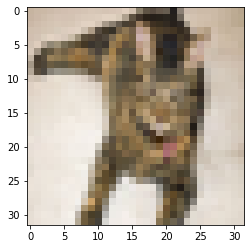

In [15]:
plt.imshow(sample_image_array / 255.0)

In [17]:
image_generator = ImageDataGenerator(horizontal_flip=True, rescale=1.0 / 255.0)

Found 270000 images belonging to 3 classes.


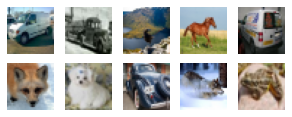

In [20]:
iterator = (image_generator .flow_from_directory(directory=data_directory, batch_size=10)) 

for batch, _ in iterator: 
  plt.figure(figsize=(5, 5)) 
  for index, image in enumerate(batch, start=1): 
    ax = plt.subplot(5, 5, index) 
    plt.imshow(image) 
    plt.axis('off') 
  plt.show()
  break